# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to simple linear regression.

### **Problem Statement**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied using simple linear regression.

In [1]:
# Importing all requied libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from csv or txt file
df = pd.read_csv("C:\Vikram\Datasets\Student_data.csv")

# Returen top 5 observations
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points and see if we can manually find any relationship between the data.

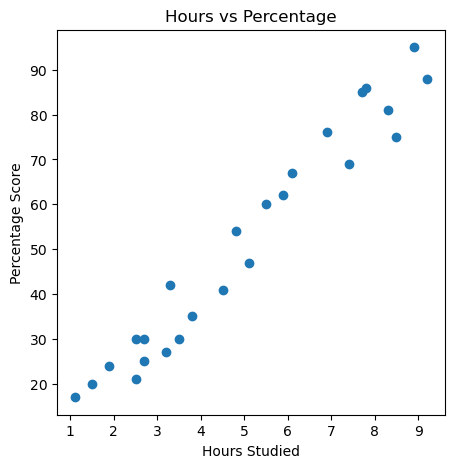

In [3]:
# Plotting the distribution of scores
plt.figure(figsize=(5,5))
plt.scatter(df['Hours'], df['Scores'])  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can see that there is a positive linear relation between the 'number of hours studied' and 'percentage of score'. That means, the increase in number of study hours increases percentage of score.**

### **Preparing the data**

The next step is to divide the data into response (Y or dependent) variable and explanatory (X or independent) variable(/s).

**The LinearRegression function in Scikit Learn module takes numpy ndarray from user, so this is necessary convert pandas Data Series / DataFrame into numpy ndarray.**

In [4]:
# Convert pandas data series object to numpy ndarray
# numpy (n,1) array
X =np.array(df['Hours']).reshape(-1,1)

# pandas Series (with n observations)
y = df['Scores']

Now that we have our dependent and independent variables, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# numpy array
print(X_train.shape)
# pandas Series
print(y_train.shape)
# numpy array
print(X_test.shape)
# pandas Series
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


### **Training the Algorithm**
We have split our data into training and testing sets, and now we will train our algorithm. 

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train, y_train)

### Checking the accuracy of the regression model:

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We check the R-squared value and the mean square error. There are many such metrics.

In [7]:
print("R-squared value:", reg.score(X_train, y_train))

R-squared value: 0.9515510725211552


**Closer the R-squared value to 1, more the accurate the regression model is.**

The R-squared value approximately equal to 0.9515, this gives, about 95.15% of variation in 'Percentage of Scores' (response variable) explained by 'number of hours of study' (explanatory variable).

Therefore, we can use the regression model to make predictions.

**Regression Coefficients**

In [8]:
print("Slope:", reg.coef_)
print("Intercept:", reg.intercept_)

Slope: [9.91065648]
Intercept: 2.018160041434683


### **Making Predictions**
We have trained our algorithm, it's time to make predictions for test dataset.

In [9]:
y_pred = reg.predict(X_test)

In [10]:
# Comparing Actual vs Predicted
y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
y_df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [11]:
# Mean Square Error:
from sklearn import metrics
MSE = metrics.mean_absolute_error(y_test, y_pred)
# MSE = metrics.mean_squared_error(y_pred, y_test)
# both gives the same result
MSE

4.183859899002975

Lower the mean square error (MSE) better the model.

Here, MSE = 4.1839, which can be considered as low.

In [12]:
# prediction of % score for given number of hours of study
n_hours = 9.25
n_score = reg.predict(np.array(n_hours).reshape(-1,1))
print("Number of hours of study: {}".format(n_hours))
print("Percent Score: {}".format(n_score))

Number of hours of study: 9.25
Percent Score: [93.69173249]


Using the simple linear regression, we could able to predict the percentage scores as **93.69** for a student who studies for **9.5 hours**.